In [16]:
import sklearn as sk
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
df = pd.read_csv("../data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


target
1    165
0    138
Name: count, dtype: int64


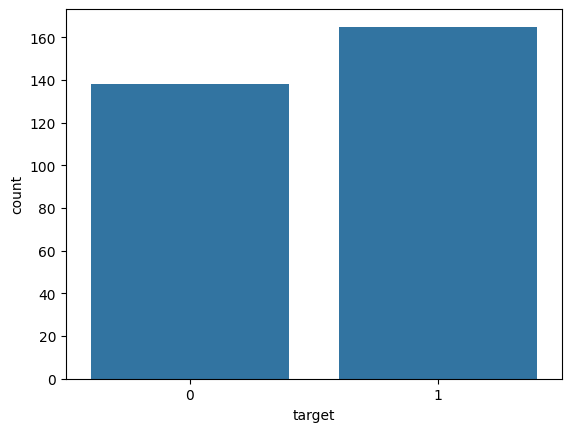

In [19]:
sns.countplot (data=df, x="target")
print (df['target'].value_counts())

In [ ]:
for col in df.columns : 
    print (col, set(df[col]))

In [20]:
for col in df.columns : 
    print (col, set(df[col]))
    print (df[col].dtype)

age {29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77}
int64
sex {0, 1}
int64
cp {0, 1, 2, 3}
int64
trestbps {128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200, 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126}
int64
chol {564, 126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 

In [21]:
X = df.drop(columns=['target'])
y = df['target']

X.shape, y.shape

((303, 13), (303,))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y)

display(X_train.head(5))
display(y_train.head(5))
display(X_test.head(5))
display(y_test.head(5))

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (y_train)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2


274    0
173    0
295    0
77     1
51     1
Name: target, dtype: int64

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2


157    1
76     1
9      1
82     1
167    0
Name: target, dtype: int64

(242, 13) (61, 13) (242,) (61,)
274    0
173    0
295    0
77     1
51     1
      ..
32     1
127    1
47     1
119    1
103    1
Name: target, Length: 242, dtype: int64


              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.89      0.94        37

    accuracy                           0.93        61
   macro avg       0.93      0.95      0.93        61
weighted avg       0.94      0.93      0.94        61

accuracy :  0.9344262295081968
f1_score :  0.932967032967033
recall :  0.9459459459459459
precision :  0.9285714285714286
[[24  4]
 [ 0 33]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

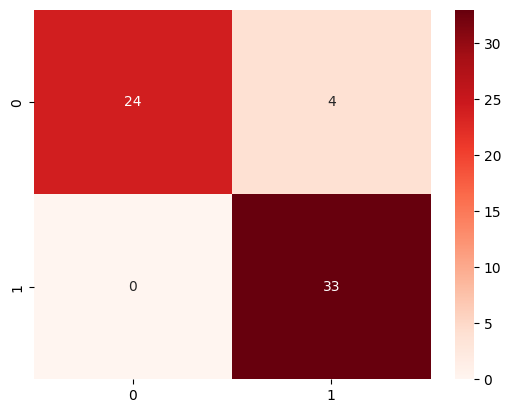

In [28]:
# LR

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score 
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

accuracy :  0.8032786885245902
f1_score :  0.8032258064516129
recall :  0.8060344827586207
precision :  0.8073593073593073
[[24  4]
 [ 8 25]]


<Axes: >

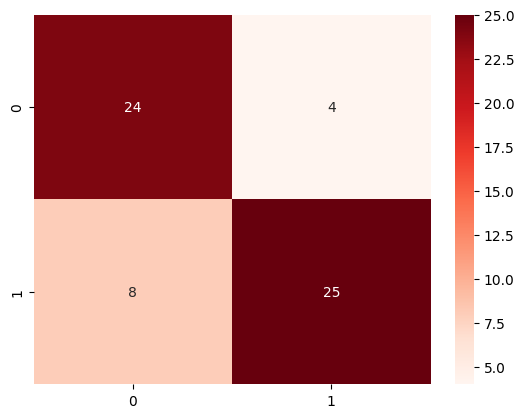

In [29]:
# DT

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.94      0.86      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

accuracy :  0.8852459016393442
f1_score :  0.883237626469784
recall :  0.8905555555555555
precision :  0.8804112554112554
[1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1]
157    1
76     1
9      1
82     1
167    0
10     1
186    0
115    1
132    1
228    0
128    1
39     1
285    0
210    0
100    1
67     1
0      1
83     1
265    0
24     1
Name: target, dtype: int64
[[23  5]
 [ 2 31]]


<Axes: >

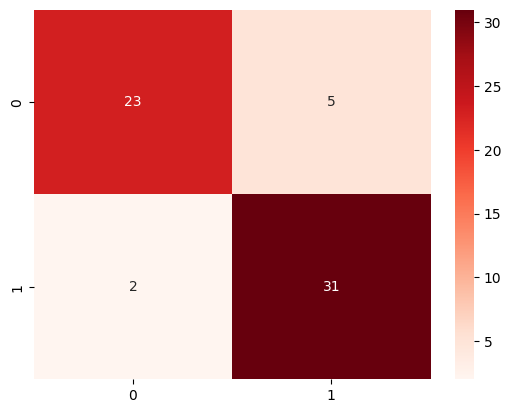

In [30]:
# RF

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

print (y_pred[:20])
print (y_test[:20])

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

              precision    recall  f1-score   support

           0       0.54      0.75      0.62        20
           1       0.85      0.68      0.76        41

    accuracy                           0.70        61
   macro avg       0.69      0.72      0.69        61
weighted avg       0.75      0.70      0.71        61

accuracy :  0.7049180327868853
f1_score :  0.6908783783783784
recall :  0.7164634146341464
precision :  0.6920995670995671
[[15 13]
 [ 5 28]]


<Axes: >

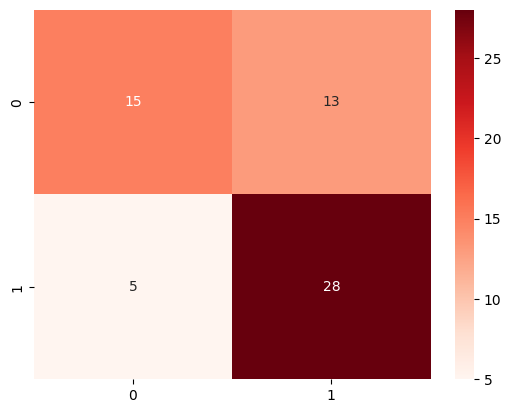

In [31]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')

In [32]:
# KNN with finding elbow

from sklearn.metrics import accuracy_score

scores = []

for K in range (50) : 
    model = KNeighborsClassifier(n_neighbors=K+1)
    model.fit (X_train, y_train)
    y_pred = model.predict (X_test)
    print (K+1)
    print ("accuracy : ", accuracy_score(y_pred, y_test))
    print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
    print ("recall : ", recall_score(y_pred, y_test, average='macro'))
    print ("precision : ", precision_score(y_pred, y_test, average='macro'))
    print ()
    scores.append (1-accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(20, 4))
plt.plot (scores)
plt.xticks([i for i in range (1, 51)])


1
accuracy :  0.7049180327868853
f1_score :  0.7009803921568627
recall :  0.7032967032967032
precision :  0.7002164502164503

2
accuracy :  0.5737704918032787
f1_score :  0.553490990990991
recall :  0.6275362318840579
precision :  0.5952380952380952

3
accuracy :  0.6885245901639344
f1_score :  0.6854816824966079
recall :  0.6862745098039216
precision :  0.6850649350649352

4
accuracy :  0.6557377049180327
f1_score :  0.654251012145749
recall :  0.6722972972972974
precision :  0.6655844155844155

5
accuracy :  0.7049180327868853
f1_score :  0.6908783783783784
recall :  0.7164634146341464
precision :  0.6920995670995671

6
accuracy :  0.7377049180327869
f1_score :  0.7359307359307359
recall :  0.7359307359307359
precision :  0.7359307359307359

7
accuracy :  0.7540983606557377
f1_score :  0.7473073736536868
recall :  0.7597254004576659
precision :  0.7456709956709957

8
accuracy :  0.7377049180327869
f1_score :  0.7342047930283224
recall :  0.7368131868131869
precision :  0.733225108225

NameError: name 'plt' is not defined

              precision    recall  f1-score   support

           0       0.46      0.87      0.60        15
           1       0.94      0.67      0.78        46

    accuracy                           0.72        61
   macro avg       0.70      0.77      0.69        61
weighted avg       0.82      0.72      0.74        61

accuracy :  0.7213114754098361
f1_score :  0.694730644686488
recall :  0.7702898550724637
precision :  0.7018398268398269
[[13 15]
 [ 2 31]]


<Axes: >

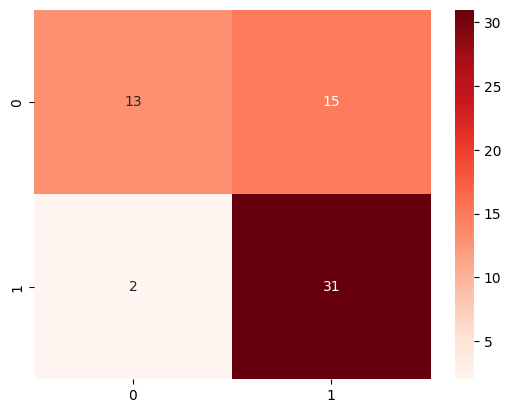

In [33]:
# SVM

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

print ("accuracy : ", accuracy_score(y_pred, y_test))
print ("f1_score : ", f1_score(y_pred, y_test, average='macro'))
print ("recall : ", recall_score(y_pred, y_test, average='macro'))
print ("precision : ", precision_score(y_pred, y_test, average='macro'))

cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Reds')